#### 梯度上升求解前n个主成分

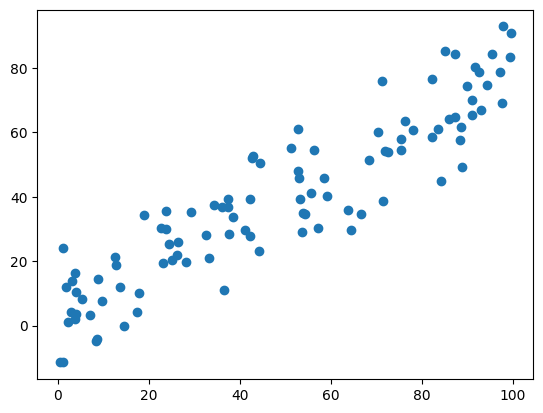

In [1]:
# 手动生成测试样例

import numpy as np
X = np.empty((100,2))
X[:,0] = np.random.uniform(0,100,size=100) # 生成0-100之间均匀分布的特征1
X[:,1] = 0.75*X[:,0] + 3 + np.random.normal(0,10,size=100) # 特征2与特征1呈线性关系，构成测试用例时，添加一些高斯噪声

# 可视化测试样例
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])
plt.show()

In [2]:
# 目标函数
def f(w,X):
    return (X.dot(w)).T.dot(X.dot(w))  / (len(X)-1)

In [3]:
# 解析式梯度
def df_math(w,X):
    return X.T.dot(X.dot(w)) * 2/ (len(X)-1)

In [4]:
# 模为1的方向向量
def direction(w):
    return w / np.linalg.norm(w)

In [7]:
# 梯度上升算法求解第一主成分
def first_component(df,initial_w,X,eta,max_iters=1e4, epsilon=1e-8):
    # 取模为1的方向向量
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter<max_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w,X)-f(last_w,X))<epsilon):
            break
        cur_iter += 1
    return w

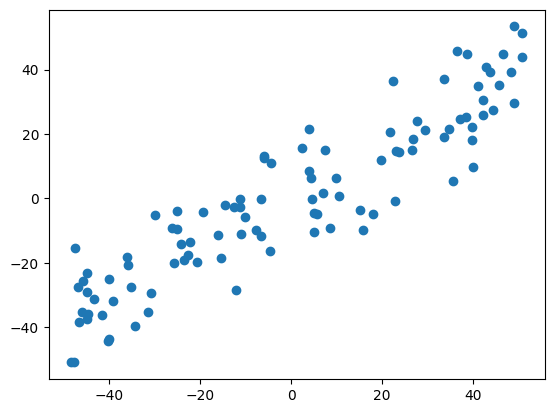

In [6]:
# demean
def demean(X):
    return X - np.mean(X,axis=0)

X_demean = demean(X)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

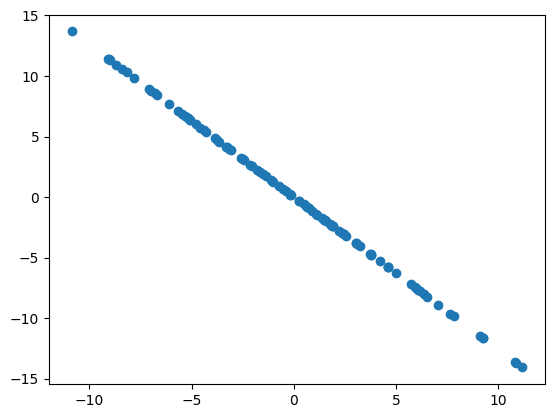

In [8]:
# 利用梯度上升法求出第一主成分
# 设置初值与步长
initial_w = np.random.random((X.shape[1]))
eta = 0.001
first_w = first_component(df_math, initial_w, X_demean, eta)

# 原数据去掉第一主成分
X_project = X_demean.dot(first_w).reshape(-1,1) * first_w
X2 = X_demean - X_project
plt.scatter(X2[:,0], X2[:,1])
plt.show()

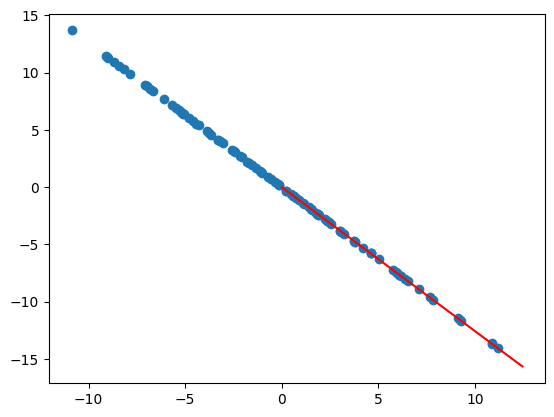

In [10]:
# 求解新数据的第一主成分，也就是原数据的第二主成分
Second_w = first_component(df_math, initial_w, X2, eta, max_iters = 1e8, epsilon=1e-8)
plt.scatter(X2[:,0],X2[:,1])
plt.plot([0, Second_w[0]*20], [0, Second_w[1]*20], color='r')
plt.show()

In [11]:
first_w.dot(Second_w)

np.float64(2.0457889752689695e-05)

In [12]:
# 求解前n个主成分（n个投影方向）

def first_n_components(df,n,X,eta=0.01,max_iters=1e4,epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w  = first_component(df,initial_w,X_pca,eta) # 计算当前第一主成分
        res.append(w)
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1)*w # 去掉当前第一主成分
    return res

res = first_n_components(df_math,2,X)
print(res)

[array([0.78249873, 0.62265218]), array([-0.6226488 ,  0.78250142])]


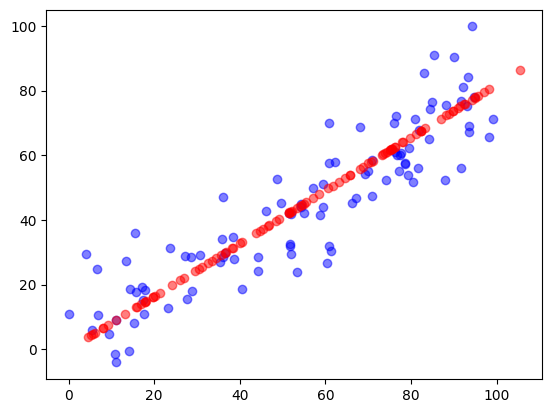

In [15]:
# 1）使用前文的测试用例
import numpy as np
import matplotlib.pyplot as plt
X = np.empty((100,2))

X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0., 10., size=100)

# 2）前2个主成分
W_2 = first_n_components(df_math,2,X) # demean放在了函数内部

# 3） 将原数据降为1维数据
X_reduction = X.dot(W_2[0].T)

# 4） 将数据恢复为2维数据
X_restore = X_reduction.reshape(-1,1).dot(W_2[0].reshape(1,-1))
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)
plt.show()